In [245]:
# assignment 1
import pandas as pd

dataset = pd.read_csv("C:/Users/bayuk/OneDrive/Documents/AI/pens/smtr3/Machine Learning/Data/milk.csv")
dataset

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [246]:
# assignment 2
dataset = dataset.fillna(dataset.groupby("Grade").transform("mean"))
print("\n Dataset setelah pengisian mising value\n", dataset)


 Dataset setelah pengisian mising value
        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]


In [247]:
# Mengecek korelasi 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.impute import SimpleImputer
# Pilih fitur yang memiliki korelasi tinggi dengan target 'Grade' menggunakan RFE

# Memilih atribut yang akan digunakan
selected_features = ['pH','Temprature','Taste', "Fat ", 'Odor','Turbidity','Colour']

# Memisahkan fitur dan target
X = dataset[selected_features]
y = dataset["Grade"]

# Langkah 1: Lakukan pengisian missing value jika ada atribut yang kosong
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Langkah 2: Inisialisasi model Decision Tree
model = dtc()

# Langkah 3: Inisialisasi RFE
rfe = RFE(model, n_features_to_select=2)  # Mengambil 2 fitur terbaik 

# Langkah 4: Melatih RFE
fit = rfe.fit(X, y)

# Mengambil indeks dari fitur-fitur yang terpilih
selected_features_indices = fit.support_

# Mendapatkan nama fitur yang terpilih
selected_features = dataset[selected_features].columns[selected_features_indices]

print("Fitur yang terpilih:")
print(selected_features)

Fitur yang terpilih:
Index(['pH', 'Temprature'], dtype='object')


In [248]:
# assignment 3
from sklearn.preprocessing import MinMaxScaler

# Menghapus variable Grade
dataset = dataset.drop(columns=["Grade"])

# Membuat objek scaler dengan rentang 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Melakukan normalisasi pada data
data_norm = scaler.fit_transform(dataset)
print("Data ternormalisasi:\n", data_norm)

# Membuat dataframe pandas dari data ternormalisasi
df = pd.DataFrame(data_norm, columns=[ "pH",  "Temprature",  "Taste",  "Odor",  "Fat",   "Turbidity",  "Colour"])
print("Dataframe setelah ternormalisasi:\n", df)

Data ternormalisasi:
 [[0.55384615 0.01785714 1.         ... 1.         0.         0.93333333]
 [0.55384615 0.03571429 0.         ... 0.         1.         0.86666667]
 [0.84615385 0.64285714 1.         ... 1.         1.         0.4       ]
 ...
 [0.         0.10714286 1.         ... 1.         1.         1.        ]
 [0.58461538 0.16071429 1.         ... 1.         0.         0.66666667]
 [0.86153846 0.375      0.         ... 1.         1.         1.        ]]
Dataframe setelah ternormalisasi:
             pH  Temprature  Taste  Odor  Fat  Turbidity    Colour
0     0.553846    0.017857    1.0   0.0  1.0        0.0  0.933333
1     0.553846    0.035714    0.0   1.0  0.0        1.0  0.866667
2     0.846154    0.642857    1.0   1.0  1.0        1.0  0.400000
3     1.000000    0.000000    1.0   1.0  0.0        1.0  1.000000
4     0.553846    0.053571    0.0   0.0  0.0        0.0  1.000000
...        ...         ...    ...   ...  ...        ...       ...
1054  0.569231    0.196429    1.0   1


Hasil clustering:
 [2 1 1 ... 1 2 1]


<Axes: xlabel='Temprature', ylabel='Turbidity'>

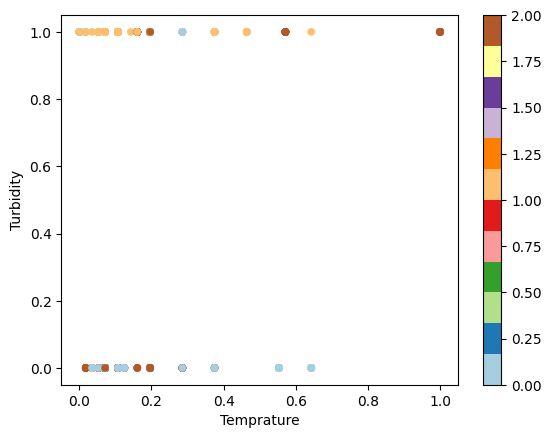

In [253]:
# assignment 4
from sklearn.cluster import KMeans

data = df.loc[:,['pH','Temprature','Taste',"Fat",'Odor','Turbidity','Colour']]

clustering = KMeans(n_clusters=3, init="random", n_init=1)
clusters=clustering.fit_predict(data)

print('\nHasil clustering:\n', clusters)

data.plot(x='Temprature', y='Turbidity', kind='scatter', c=clusters, colormap='Paired') 


Hasil clustering:
 [1 0 0 ... 0 1 0]


<Axes: xlabel='Temprature', ylabel='Turbidity'>

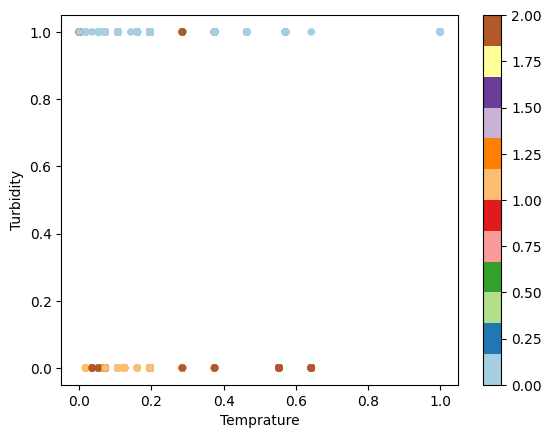

In [256]:
# assignment 5 average
from sklearn.cluster import AgglomerativeClustering

data = df.loc[:,['pH','Temprature','Taste',"Fat",'Odor','Turbidity','Colour']]

clustering=AgglomerativeClustering(n_clusters=3, linkage='average')
clusters=clustering.fit_predict(data)

print('\nHasil clustering:\n', clusters)

data.plot(x='Temprature', y='Turbidity', kind='scatter', c=clusters, colormap='Paired') 


Hasil clustering:
 [0 0 0 ... 0 0 0]


<Axes: xlabel='Temprature', ylabel='Turbidity'>

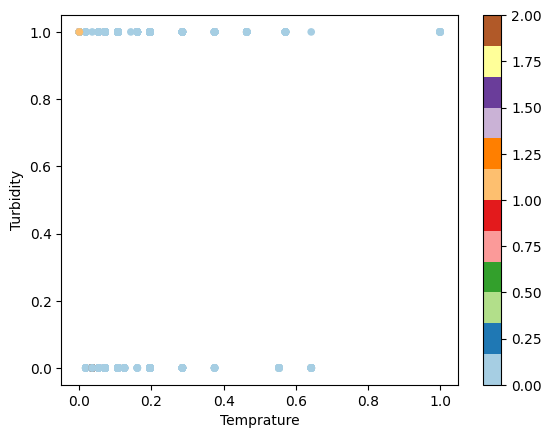

In [257]:
# assignment 5 single
from sklearn.cluster import AgglomerativeClustering

data = df.loc[:,['pH','Temprature','Taste',"Fat",'Odor','Turbidity','Colour']]

clustering=AgglomerativeClustering(n_clusters=3, linkage='single')
clusters=clustering.fit_predict(data)

print('\nHasil clustering:\n', clusters)

data.plot(x='Temprature', y='Turbidity', kind='scatter', c=clusters, colormap='Paired') 


Hasil clustering:
 [2 1 1 ... 1 2 1]


<Axes: xlabel='Temprature', ylabel='Turbidity'>

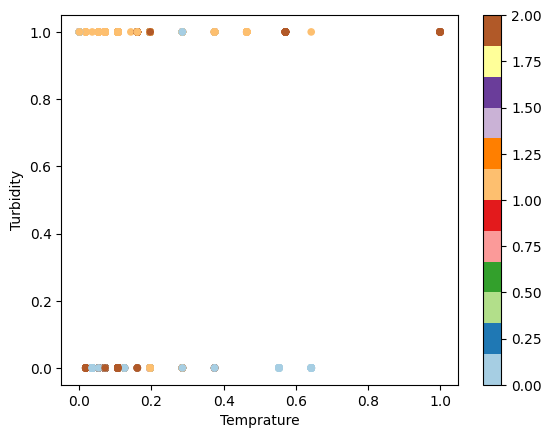

In [259]:
# assignment 5 complete
from sklearn.cluster import AgglomerativeClustering

data = df.loc[:,['pH','Temprature','Taste',"Fat",'Odor','Turbidity','Colour']]

clustering=AgglomerativeClustering(n_clusters=3, linkage='complete')
clusters=clustering.fit_predict(data)

print('\nHasil clustering:\n', clusters)

data.plot(x='Temprature', y='Turbidity', kind='scatter', c=clusters, colormap='Paired') 

In [105]:
# assignment 1
import pandas as pd

dataset = pd.read_csv("C:/Users/bayuk/OneDrive/Documents/AI/pens/smtr3/Machine Learning/Data/water_potability.csv")
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [106]:
# assignment 2
dataset = dataset.fillna(dataset.groupby("Potability").transform("mean"))
print("\n Dataset setelah pengisian mising value\n", dataset)


 Dataset setelah pengisian mising value
             ph    Hardness       Solids  Chloramines     Sulfate  \
0     7.085378  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246  334.564290   
2     8.099124  224.236259  19909.54173     9.275884  334.564290   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  332.566990   
3273  9.419510  175.762646  33155.57822     7.350233  332.566990   
3274  5.126763  230.603758  11983.86938     6.303357  332.566990   
3275  7.874671  195.102299  17404.17706     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135  

In [107]:
# Mengecek korelasi 
# Pilih fitur yang memiliki korelasi tinggi dengan target 'Potability' menggunakan RFE

# Memilih atribut yang akan digunakan
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Memisahkan fitur dan target
X = dataset[selected_features]
y = dataset['Potability']

# Langkah 1: Lakukan pengisian missing value jika ada atribut yang kosong
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Langkah 2: Inisialisasi model Decision Tree
model = dtc()

# Langkah 3: Inisialisasi RFE
rfe = RFE(model, n_features_to_select=2)  # Mengambil 2 fitur terbaik 

# Langkah 4: Melatih RFE
fit = rfe.fit(X, y)

# Mengambil indeks dari fitur-fitur yang terpilih
selected_features_indices = fit.support_

# Mendapatkan nama fitur yang terpilih
selected_features = dataset[selected_features].columns[selected_features_indices]

print("Fitur yang terpilih:")
print(selected_features)

Fitur yang terpilih:
Index(['ph', 'Sulfate'], dtype='object')


In [109]:
# assignment 3
from sklearn.preprocessing import MinMaxScaler

# Membuat objek scaler dengan rentang 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Melakukan normalisasi pada data
data_norm = scaler.fit_transform(dataset)
print("Data ternormalisasi:\n", data_norm)

# Membuat dataframe pandas dari data ternormalisasi
df = pd.DataFrame(data_norm, columns=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'])
print("Dataframe setelah ternormalisasi:\n", df)

Data ternormalisasi:
 [[0.50609846 0.57113901 0.33609646 ... 0.69975313 0.28609102 0.        ]
 [0.26543429 0.29740043 0.30061142 ... 0.4509993  0.57679264 0.        ]
 [0.57850887 0.64131081 0.32161885 ... 0.5328657  0.30363656 0.        ]
 ...
 [0.67282217 0.46548556 0.53910122 ... 0.56065454 0.34956996 1.        ]
 [0.36619735 0.66440723 0.19148981 ... 0.62265916 0.61611996 1.        ]
 [0.56247653 0.53563505 0.28048408 ... 0.63247754 0.16244074 1.        ]]
Dataframe setelah ternormalisasi:
             ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0     0.506098  0.571139  0.336096     0.543891  0.680385      0.669439   
1     0.265434  0.297400  0.300611     0.491839  0.583939      0.719411   
2     0.578509  0.641311  0.321619     0.698543  0.583939      0.414652   
3     0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4     0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   
...        ...       ...       ...          ...  


Hasil clustering:
 [1 0 1 ... 0 1 1]


<Axes: xlabel='Solids', ylabel='Sulfate'>

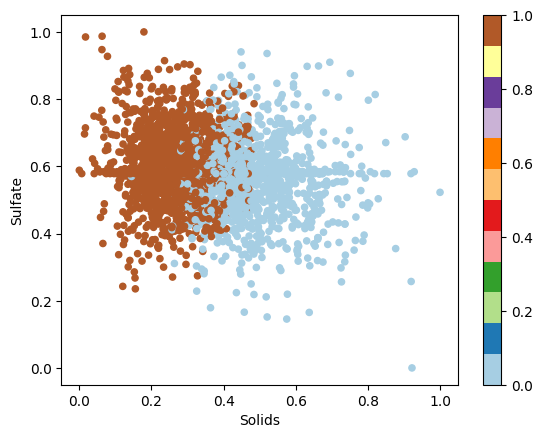

In [211]:
# assignment 4
from sklearn.cluster import KMeans

data = df.loc[:,['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

clustering = KMeans(n_clusters=2, init="random", n_init=1)
clusters=clustering.fit_predict(data)

print('\nHasil clustering:\n', clusters)

data.plot(x='Solids', y='Sulfate', kind='scatter', c=clusters, colormap='Paired')


Hasil clustering:
 [0 0 0 ... 0 0 0]


<Axes: xlabel='Solids', ylabel='Sulfate'>

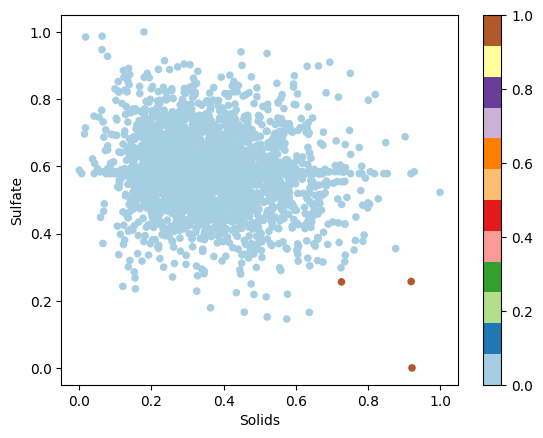

In [225]:
# assignment 5 average
from sklearn.cluster import AgglomerativeClustering

data = df.loc[:,['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

clustering=AgglomerativeClustering(n_clusters=2, linkage='average')
clusters=clustering.fit_predict(data)

print('\nHasil clustering:\n', clusters)

data.plot(x='Solids', y='Sulfate', kind='scatter', c=clusters, colormap='Paired') 


Hasil clustering:
 [0 0 0 ... 0 0 0]


<Axes: xlabel='Solids', ylabel='Sulfate'>

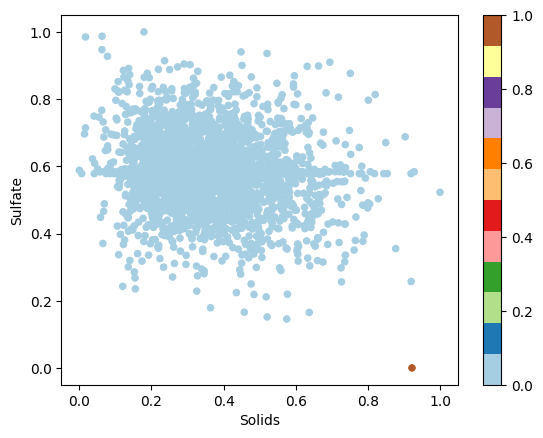

In [226]:
# assignment 5 single
from sklearn.cluster import AgglomerativeClustering

data = df.loc[:,['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

clustering=AgglomerativeClustering(n_clusters=2, linkage='single')
clusters=clustering.fit_predict(data)

print('\nHasil clustering:\n', clusters)

data.plot(x='Solids', y='Sulfate', kind='scatter', c=clusters, colormap='Paired') 


Hasil clustering:
 [0 0 0 ... 0 0 0]


<Axes: xlabel='Solids', ylabel='Sulfate'>

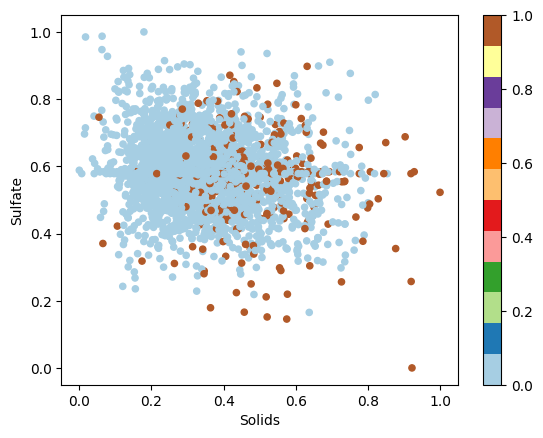

In [240]:
# assignment 5 complete
from sklearn.cluster import AgglomerativeClustering

data = df.loc[:,['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

clustering=AgglomerativeClustering(n_clusters=2, linkage='complete')
clusters=clustering.fit_predict(data)

print('\nHasil clustering:\n', clusters)

data.plot(x='Solids', y='Sulfate', kind='scatter', c=clusters, colormap='Paired') 